In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import HTC
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
o1=pickle.load(open('weight_100run_6000time_0-0to0-3tc_0-10-15-20-25-30-35.bin','rb'))
o1_at=pickle.load(open('weight_100run_6000time_0-0to0-3tc_0-10-15-20-25-30-35_attempts.bin','rb'))
o2=pickle.load(open('weight_100run_6000time_0-0to0-3tc_0-10-20-30-40-60-80-100-125-150.bin','rb'))
o2_at=pickle.load(open('weight_100run_6000time_0-0to0-3tc_0-10-20-30-40-60-80-100-125-150_attempts.bin','rb'))
o3=pickle.load(open('weight_100run_6000time_0-0to0-3tc_45_55_65_75_85_95_105_115_135_145_155.bin','rb'))
o3_at=pickle.load(open('weight_100run_6000time_0-0to0-3tc_45_55_65_75_85_95_105_115_135_145_155_attempts.bin','rb'))
o4=pickle.load(open('weight_100run_6000time_0-0to0-3tc_70_90_110_120_130_140_160.bin','rb'))
o4_at=pickle.load(open('weight_100run_6000time_0-0to0-3tc_70_90_110_120_130_140_160_attempts.bin','rb'))
o5=pickle.load(open('weight_100run_6000time_0-0to0-3tc_50_bis.bin','rb'))
o5_at=pickle.load(open('weight_100run_6000time_0-0to0-3tc_50_attempts_bis.bin','rb'))

In [3]:
print('o1',o1_at,'\no2',o2_at,'\no3',o3_at,'\no4',o4_at,'\no5',o5_at)

o1 {0: 1, 10: 10, 15: 5, 20: 10, 25: 5, 30: 10, 35: 5} 
o2 {0: 5, 10: 5, 20: 5, 30: 5, 40: 5, 60: 5, 80: 5, 100: 5, 125: 5, 150: 5} 
o3 {45: 5, 55: 5, 65: 5, 75: 5, 85: 5, 95: 5, 105: 5, 115: 5, 135: 5, 145: 5, 155: 5} 
o4 {70: 5, 90: 5, 110: 5, 120: 5, 130: 5, 140: 5, 160: 5} 
o5 {50: 5}


In [4]:
o=[o2[0],o2[1],o1[2],o2[2],o1[4],o2[3],o1[6],o2[4],o3[0],o5[0],o3[1],o2[5],o3[2],o4[0],o3[3],o2[6],o3[4],o4[1],o3[5],o2[7],o3[6],o4[2],o3[7],o4[3],o2[-2],o4[-3],o3[-3],o4[-2],o3[-2],o2[-1],o3[-1],o4[-1]]
#  0     10   15     20   25     30   35    40    45    50     55    60    65   70    75    80    85     90   95     100   105   110   115  120    125   130     135   140     145    150   155     160
o_a=[0]+[10+i*5 for i in range(31)]

In [5]:
tc_index={v*0.01:v for v in range(31)}
o_a_index={i:v for i,v in enumerate(o_a)}

In [6]:
rho_f=np.zeros((len(o),len(o[0][0]['tc'])))
chi_f=np.zeros((len(o),len(o[0][0]['tc'])))
rho=np.zeros((len(o[0]),len(o[0][0]['tc'])))
chi=np.zeros((len(o[0]),len(o[0][0]['tc'])))
for i in range(len(o)):
    rho,chi = HTC.rho_chi_added_weights( o[i], 'set')
    rho_f[i]=np.mean(rho,axis=0)
    chi_f[i]=np.mean(chi,axis=0)

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:211: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


In [7]:
rho_f.shape, len(o_a)

((32, 31), 32)

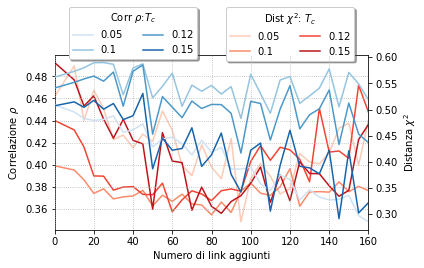

In [43]:
tc_list=[0.05,0.10,0.12,0.15]
rho_g=[[rho_f[i,tc_index[j]] for i in range(len(o_a))] for j in tc_list]
chi_g=[[chi_f[i,tc_index[j]] for i in range(len(o_a))] for j in tc_list]


fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()

for i,j in enumerate(tc_list):
    ax1.plot(o_a, rho_g[i], label=j) 
for i,j in enumerate(tc_list):
    ax2.plot(o_a, chi_g[i], label=j)
    
colormap = plt.cm.Blues #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.2, 0.8,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])  
colormap2 = plt.cm.Reds #nipy_spectral, Set1,Paired   
colors2 = [colormap2(i) for i in np.linspace(0.2, 0.8,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors2[i])
    
ax1.set_ylabel(r'Correlazione $\rho$')
ax2.set_ylabel(r'Distanza $\chi^2$')
ax2.legend(framealpha=1, title=r'Dist $\chi^2$: $T_c$',loc='upper center', bbox_to_anchor=(0.75, 1.3),ncol=2, fancybox=True, shadow=True)
ax1.legend(framealpha=1, title=r'Corr $\rho$:$T_c$',loc='upper center', bbox_to_anchor=(0.25, 1.3),ncol=2, fancybox=True, shadow=True)

ax1.set_xlabel('Numero di link aggiunti')
ax1.grid(True,which='both', ls='dotted')
plt.xlim(0,160)
plt.tight_layout()
ax1.set_zorder(1) # make it on top
ax1.set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background

plt.savefig('../Figure/Risultati/corr_chi.pdf', bbox_inches='tight')
plt.show()
